# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Automated Anomaly Detection using Z-score method

**Steps**:
1. Data Set: Download a dataset representing daily sales figures for a retail store.
2. Calculate Z-score: Compute the mean and standard deviation of the sales. Use these to
calculate the Z-score for each day's sales figure.
3. Identify Anomalies: Detect anomalies by identifying values with a Z-score above 3 or below -3.
4. Visualize: Plot a graph to visualize anomalies.

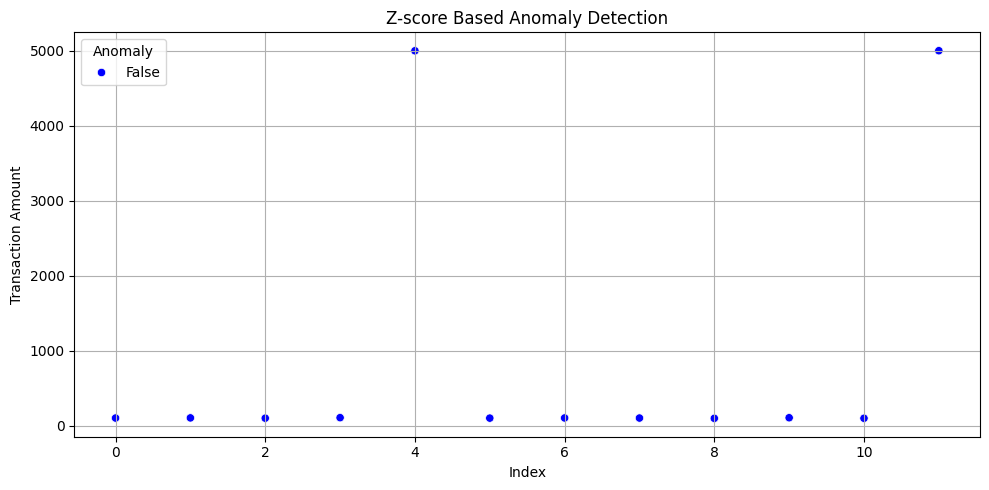

Total anomalies detected: 0
Empty DataFrame
Columns: [transaction_amount, z_score]
Index: []


In [3]:
# Q1: Automated Anomaly Detection using Z-score Method

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

def detect_anomalies_zscore(data, column, threshold=3):
    """
    Detect anomalies in a given column using the Z-score method.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column (str): Name of the column to check for anomalies.
        threshold (float): Z-score threshold for flagging anomalies.

    Returns:
        pd.DataFrame: Original DataFrame with z-scores and anomaly flags.
    """
    df = data.copy()
    df = df.dropna(subset=[column])
    df['z_score'] = zscore(df[column])
    df['anomaly'] = df['z_score'].abs() > threshold
    return df

# Sample data
df = pd.DataFrame({
    'transaction_amount': [100, 102, 98, 105, 5000, 99, 101, 100, 96, 104, 97, 5001]
})

# Run anomaly detection
result_df = detect_anomalies_zscore(df, 'transaction_amount', threshold=3)

# Plot anomalies
plt.figure(figsize=(10, 5))
sns.scatterplot(data=result_df, x=result_df.index, y='transaction_amount',
                hue='anomaly', palette={True: 'red', False: 'blue'})
plt.title("Z-score Based Anomaly Detection")
plt.xlabel("Index")
plt.ylabel("Transaction Amount")
plt.legend(title="Anomaly")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print results
print("Total anomalies detected:", result_df['anomaly'].sum())
print(result_df[result_df['anomaly'] == True][['transaction_amount', 'z_score']])
